In [2]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction
import xgboost as xgb
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
t=[]

t += [pd.read_csv('stacking/lgb_1.csv')]
t += [pd.read_csv('stacking/lgb_2.csv')]
t += [pd.read_csv('stacking/lgb_3.csv')]
t += [pd.read_csv('stacking/lgb_4.csv')]
t += [pd.read_csv('stacking/lgb_5.csv')]
t += [pd.read_csv('stacking/lgb_6.csv')]
t += [pd.read_csv('stacking/xgb_7.csv')]
t += [pd.read_csv('stacking/lgb_8.csv')]
t += [pd.read_csv('stacking/lgb_9.csv')]
t += [pd.read_csv('stacking/xgb_10.csv')]
t += [pd.read_csv('stacking/lgb_11.csv')]
#t += [pd.read_csv('stacking/xgb_12.csv')]

t += [pd.read_csv('stacking/lgb_13.csv')]
t += [pd.read_csv('stacking/lgb_14.csv')]
t += [pd.read_csv('stacking/xgb_15.csv')]
t += [pd.read_csv('stacking/lgb_16.csv')]
t += [pd.read_csv('stacking/xgb_17.csv')]
t += [pd.read_csv('stacking/lgb_18.csv')]
t += [pd.read_csv('stacking/lgb_19.csv')]
t += [pd.read_csv('stacking/xgb_20.csv')]

t += [pd.read_csv('stacking/nn_21.csv')]
t += [pd.read_csv('stacking/nn_21_lstm1.csv')]

t += [pd.read_csv('stacking/lgb_22_1.csv')]
t += [pd.read_csv('stacking/lgb_23.csv')]
t += [pd.read_csv('stacking/lgb_24.csv')]
t += [pd.read_csv('stacking/xgb_25.csv')]
t += [pd.read_csv('stacking/xgb_26.csv')]
t += [pd.read_csv('stacking/lgb_27.csv')]
t += [pd.read_csv('stacking/ext_28.csv')]

#t += [pd.read_csv('stacking/nn_16.csv')]


In [3]:
t=[]
t += [pd.read_csv('stacking/nn_21.csv')]
t += [pd.read_csv('stacking/nn_21_lstm1.csv')]

t += [pd.read_csv('stacking/lin_30.csv')]
t += [pd.read_csv('stacking/rf_29.csv')]


t += [pd.read_csv('stacking/ext_28.csv')]
t += [pd.read_csv('stacking/lgb_27.csv')]
t += [pd.read_csv('stacking/xgb_26.csv')]
t += [pd.read_csv('stacking/xgb_25.csv')]
t += [pd.read_csv('stacking/lgb_24.csv')]
t += [pd.read_csv('stacking/lgb_23.csv')]
t += [pd.read_csv('stacking/lgb_22_1.csv')]

t += [pd.read_csv('stacking/xgb_20.csv')]
t += [pd.read_csv('stacking/lgb_19.csv')]
t += [pd.read_csv('stacking/xgb_17.csv')]
t += [pd.read_csv('stacking/lgb_16.csv')]
t += [pd.read_csv('stacking/xgb_15.csv')]
t += [pd.read_csv('stacking/lgb_14.csv')]
t += [pd.read_csv('stacking/lgb_13.csv')]
t += [pd.read_csv('stacking/lgb_11.csv')]
t += [pd.read_csv('stacking/xgb_10.csv')]
t += [pd.read_csv('stacking/lgb_9.csv')]
t += [pd.read_csv('stacking/lgb_8.csv')]
t += [pd.read_csv('stacking/xgb_7.csv')]
t += [pd.read_csv('stacking/lgb_6.csv')]
t += [pd.read_csv('stacking/lgb_5.csv')]
t += [pd.read_csv('stacking/lgb_4.csv')]



In [4]:
#cols = ['high', 'low', 'medium']
Meta_data = t[0]
for i in range(1, 26):
    Meta_data = pd.concat([ Meta_data, t[i].ix[:, :] ], axis=1)
Meta_data[:2]

,lstm,lstm1,y,y,y,y,y,y,y,y,...,y,y,y,y,y,y,y,y,y,y
0,0.588275,0.329186,0.164113,0.148467,0.151347,0.071429,0.098819,0.125453,0.084895,0.218879,...,0.131830,0.192196,0.126941,0.099185,0.099451,0.182448,0.192267,0.182448,0.183238,0.344680
1,0.203615,0.280913,0.089535,0.042664,0.064917,0.018525,0.021164,0.040863,0.024587,0.049604,...,0.491451,0.105349,0.073139,0.467487,0.484703,0.142791,0.147477,0.142791,0.097609,0.043033


In [191]:
Meta_data[:2]

,lstm,lstm1,y,y,y,y,y,y,y,y,...,y,y,y,y,y,y,y,y,y,y
0,0.588275,0.329186,0.164113,0.148467,0.151347,0.071429,0.098819,0.125453,0.084895,0.218879,...,0.131830,0.192196,0.126941,0.099185,0.099451,0.182448,0.192267,0.182448,0.183238,0.344680
1,0.203615,0.280913,0.089535,0.042664,0.064917,0.018525,0.021164,0.040863,0.024587,0.049604,...,0.491451,0.105349,0.073139,0.467487,0.484703,0.142791,0.147477,0.142791,0.097609,0.043033


In [26]:
y_train_cat = keras.utils.to_categorical(y_train)

tr = Meta_data[:300000]
val = Meta_data[300001:]

y_tr = y_train_cat[:300000]
y_val = y_train_cat[300001:]

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, AveragePooling1D

Using TensorFlow backend.


In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, AveragePooling1D

#y_train_cat = keras.utils.to_categorical(y_train)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(128, activation='relu', input_dim=26))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(tr.values, y_tr,
          epochs=200,
          batch_size=100000,
          validation_data=(val.values, y_val))

Train on 300000 samples, validate on 104289 samples
Epoch 1/200
300000/300000 [==============================] - 1s - loss: 0.7312 - acc: 0.5992 - val_loss: 0.6939 - val_acc: 0.6427
Epoch 2/200
300000/300000 [==============================] - 1s - loss: 0.6722 - acc: 0.7519 - val_loss: 0.6412 - val_acc: 0.8464
Epoch 3/200
300000/300000 [==============================] - 1s - loss: 0.6206 - acc: 0.8274 - val_loss: 0.5868 - val_acc: 0.8388
Epoch 4/200
300000/300000 [==============================] - 1s - loss: 0.5728 - acc: 0.8365 - val_loss: 0.5390 - val_acc: 0.8525

In [20]:
model.predict(val.values)

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)

/home/fao3864/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


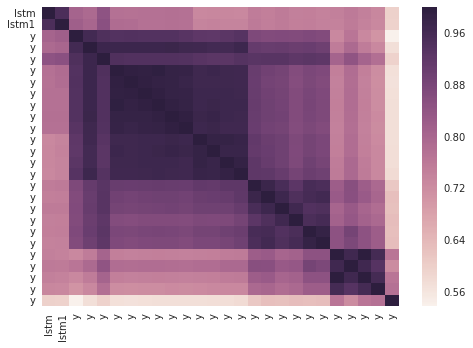

In [116]:
import seaborn as sns
CorrKoef = Meta_data.corr()
#pylab.figure(figsize=(50, 25))
sns.heatmap(CorrKoef, annot=False)

In [5]:
X_train = pd.read_csv("data/train.csv")

y_train = pd.DataFrame(X_train['is_duplicate'])
y_train.columns = ['y']
del X_train['is_duplicate']

In [41]:
param = {}
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'logloss'
param['max_depth'] = 3
# param['booster'] = 'dart'
#param['booster'] = 'gblinear'
param['eta'] = 0.1
#param['subsample'] = 0.7
# param["scale_pos_weight"] = 0.5
#param['colsample_bytree'] = 0.7
param['nthread'] = -1
#param['num_class'] = 3
#param['alpha'] = 0.00
#param['lambda_bias'] = 0.1
# param['lambda'] = 0
param['min_child_weight'] = 100

# if param['booster'] == 'gblinear': param['eta'] *= 1e-4
numround = 500



#LGBM
params = {
    #'task': 'train',
    #'boosting_type': 'gbdt',
    #'objective': 'regression',
    #'metric': {'l2', 'auc'},
    #'num_leaves': 31,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.8,
    #'bagging_freq': 5,
    #'subsample': 0.8,
    #'colsample_bytree': 0.8,
    'objective': 'binary',
    'nthread': -1,
    'learning_rate': 0.05,
    'min_child_weight': 100,
    #'max_depth': 6
    #'num_class': 3
    
}



y_train_cat = keras.utils.to_categorical(y_train)

skf = StratifiedKFold(5, shuffle=True, random_state=0)
pred_train = np.zeros(len(y_train))
xgbs = []
sc,sc_mean = [],[]

for itr, ite in skf.split(Meta_data, y_train.y.values):
    ypred = []
    for i in range(1):
               
        param['seed'] = i+1
        '''
        #xgboost
        Xdatatrain = xgb.DMatrix(data=Meta_data.ix[itr, :].values,
                                     label=y_train.ix[itr].values)
        Xdataval = xgb.DMatrix(data=Meta_data.ix[ite, :].values,
                                     label=y_train.ix[ite].values)

        plst = list(param.items())
        watchlist = [(Xdatatrain, 'train'), (Xdataval, 'eval')]
        bst = xgb.train(plst, Xdatatrain, numround, evals=watchlist, verbose_eval=20)

        #pred_train[ite] = bst.predict(Xdataval)
        ypred = bst.predict(Xdataval)
        
        #rc = ensemble.ExtraTreesClassifier(n_estimators=1300, criterion='gini', max_depth=None, n_jobs=-1)
        #rc.fit(Meta_data.ix[itr, :], y_train.ix[itr])
        #ypred = rc.predict_proba(Meta_data.ix[ite, :])
        '''
        lgb = lgbm.sklearn.LGBMClassifier(n_estimators=300, seed=0, **params)
        lgb.fit(Meta_data.ix[itr, :], y_train.ix[itr])
        ypred = lgb.predict_proba(Meta_data.ix[ite, :])[:, 1]
        #pred_train[ite] = lgb.predict_proba(Meta_data.ix[ite, :])
        #xgbs.append(bst)
        '''
        model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
        model.add(Dense(128, activation='relu', input_dim=26))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))

        model.add(Dense(2, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

        model.fit(Meta_data.ix[itr, :].values, y_train_cat[itr],
          epochs=200,
          batch_size=100000,
          validation_data=(Meta_data.ix[ite, :].values, y_train_cat[ite]))
        ypred = model.predict(Meta_data.ix[ite, :].values)[:, 1]
    #ypred = sum(ypred) / len(ypred)
    '''
    pred_train[ite] = ypred
    #print(ypred[:10])
    #print(pred_train[ite[:10]])
    #print(log_loss(y_train.ix[ite, :], ypred))
    #print(log_loss(y_train.ix[ite, :], pred_train[ite]))
    
    sc.append(log_loss(y_train.ix[ite, :], ypred))
#     break 0.523298 0.5192 0.517532 0.515532 0.505869

print('XGB: {:.5f} +- {:.3f}'.format(np.mean(sc), np.std(sc)))

/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

XGB: 0.20438 +- 0.002


In [37]:
pred_train

array([  3.03068191e-01,   6.73960224e-02,   5.59247732e-01, ...,
         1.90940619e-01,   1.31926063e-04,   7.78078675e-01])

In [42]:
pred_train = pd.DataFrame(pred_train)
pred_train.columns = ['lgb']
pred_train.to_csv("stacking/2_lev_lgb_train.csv", index=None)

In [43]:
p1 = pd.read_csv('stacking/2_lev_xgb_train.csv')
p2 = pd.read_csv('stacking/2_lev_lgb_train.csv')
p3 = pd.read_csv('stacking/2_lev_nn_train.csv')

p = pd.concat([p1, p2], axis=1)
p = pd.concat([p, p3], axis=1)

p = pd.concat([p, y_train], axis=1)


In [44]:
p[:10]

,xgb,lgb,nn,y
0,0.300593,0.296974,0.303068,0
1,0.062017,0.078080,0.067396,0
2,0.508429,0.559534,0.559248,0
3,0.000163,0.000229,0.000145,0
4,0.000198,0.000293,0.000140,0
5,0.599393,0.594764,0.580791,1
6,0.000209,0.000274,0.000173,0
7,0.687822,0.702944,0.668942,1
8,0.239915,0.239637,0.266307,0
9,0.122542,0.143021,0.127387,0


In [72]:
del p['y']

In [45]:
best = 100
best_i = 0
best_j = 0
for i in linspace(0, 1, 20):
    for j in linspace(i, 1, 20):
        tmp = p.ix[:, 0] * i + p.ix[:, 1] * (j-i) + p.ix[:, 2] * (1-j)
        loss = log_loss(y_train, tmp)
        if best > loss:
            best = loss
            best_i = i
            best_j = j            

In [46]:
print(best_i)
print(best_j - best_i)
print(1-best_j)

0.421052631579
0.274238227147
0.304709141274


In [97]:
best

0.2037331613326831

In [47]:
log_loss(p.ix[:, 3], p.ix[:, 0])

0.20420513324214362

In [48]:
log_loss(p.ix[:, 3], p.ix[:, 1])

0.20438268638514437

In [49]:
log_loss(p.ix[:, 3], p.ix[:, 2])

0.20517794290765873

In [50]:
log_loss(p.ix[:, 3], tmp)

0.20420513324214362

In [63]:
tmp = (p.ix[:, 0] + p.ix[:, 1] + p.ix[:, 2]) / 3.0

In [68]:
tmp = (p.ix[:, 0] + p.ix[:, 1]) / 2.0

In [ ]:
xgb 0.20422 0.20421
0,20446
0.20438
0.20456

0.20017
0.20458
0.20965
0.20921
0.22119
0.26868

In [ ]:
79

In [8]:
t=[]

t += [pd.read_csv('stacking/lgb_1_test.csv')]
t += [pd.read_csv('stacking/lgb_2_test.csv')]
t += [pd.read_csv('stacking/lgb_3_test.csv')]
t += [pd.read_csv('stacking/lgb_4_test.csv')]
t += [pd.read_csv('stacking/lgb_5_test.csv')]
t += [pd.read_csv('stacking/lgb_6_test.csv')]
t += [pd.read_csv('stacking/xgb_7_test.csv')]
t += [pd.read_csv('stacking/lgb_8_test.csv')]
t += [pd.read_csv('stacking/lgb_9_test.csv')]
t += [pd.read_csv('stacking/xgb_10_test.csv')]
t += [pd.read_csv('stacking/lgb_11_test.csv')]
#t += [pd.read_csv('stacking/xgb_12.csv')]

t += [pd.read_csv('stacking/lgb_13_test.csv')]
t += [pd.read_csv('stacking/lgb_14_test.csv')]
t += [pd.read_csv('stacking/xgb_15_test.csv')]
t += [pd.read_csv('stacking/lgb_16_test.csv')]
t += [pd.read_csv('stacking/xgb_17_test.csv')]
t += [pd.read_csv('stacking/lgb_18_test.csv')]
t += [pd.read_csv('stacking/lgb_19_test.csv')]
t += [pd.read_csv('stacking/xgb_20_test.csv')]

t += [pd.read_csv('stacking/nn_21_test.csv')]
t += [pd.read_csv('stacking/nn_21_lstm1_test.csv')]

t += [pd.read_csv('stacking/lgb_22_1_test.csv')]
t += [pd.read_csv('stacking/lgb_23_test.csv')]
t += [pd.read_csv('stacking/lgb_24_test.csv')]
t += [pd.read_csv('stacking/xgb_25_test.csv')]
t += [pd.read_csv('stacking/xgb_26_test.csv')]
t += [pd.read_csv('stacking/lgb_27_test.csv')]
t += [pd.read_csv('stacking/ext_28_test.csv')]

In [51]:
t=[]
t += [pd.read_csv('stacking/nn_21_test.csv')]
t += [pd.read_csv('stacking/nn_21_lstm1_test.csv')]

t += [pd.read_csv('stacking/lin_30_test.csv')]
t += [pd.read_csv('stacking/rf_29_test.csv')]
t += [pd.read_csv('stacking/ext_28_test.csv')]
t += [pd.read_csv('stacking/lgb_27_test.csv')]
t += [pd.read_csv('stacking/xgb_26_test.csv')]
t += [pd.read_csv('stacking/xgb_25_test.csv')]
t += [pd.read_csv('stacking/lgb_24_test.csv')]
t += [pd.read_csv('stacking/lgb_23_test.csv')]
t += [pd.read_csv('stacking/lgb_22_1_test.csv')]

t += [pd.read_csv('stacking/xgb_20_test.csv')]
t += [pd.read_csv('stacking/lgb_19_test.csv')]
t += [pd.read_csv('stacking/xgb_17_test.csv')]
t += [pd.read_csv('stacking/lgb_16_test.csv')]
t += [pd.read_csv('stacking/xgb_15_test.csv')]
t += [pd.read_csv('stacking/lgb_14_test.csv')]
t += [pd.read_csv('stacking/lgb_13_test.csv')]
t += [pd.read_csv('stacking/lgb_11_test.csv')]
t += [pd.read_csv('stacking/xgb_10_test.csv')]
t += [pd.read_csv('stacking/lgb_9_test.csv')]
t += [pd.read_csv('stacking/lgb_8_test.csv')]
t += [pd.read_csv('stacking/xgb_7_test.csv')]
t += [pd.read_csv('stacking/lgb_6_test.csv')]
t += [pd.read_csv('stacking/lgb_5_test.csv')]
t += [pd.read_csv('stacking/lgb_4_test.csv')]



In [53]:
#cols = ['high', 'low', 'medium']
Meta_test = t[0].ix[:, :]
Meta_test = pd.concat([ Meta_test, t[1].ix[:, :] ], axis=1)

for i in range(2, 26):
    Meta_test = pd.concat([ Meta_test, t[i].ix[:, 1] ], axis=1)
Meta_test[:3]

,lstm,lstm1,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,...,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate
0,0.102577,0.075481,0.015607,0.001210,0.004950,0.001163,0.001088,0.000465,0.000893,0.002004,...,0.002633,0.001608,0.004466,0.004911,0.014965,0.020623,0.017854,0.020623,0.016867,0.021046
1,0.310506,0.413205,0.116541,0.116393,0.150702,0.092256,0.146148,0.130492,0.086183,0.066443,...,0.323567,0.312369,0.235243,0.320104,0.335637,0.164045,0.208719,0.164045,0.157323,0.314511
2,0.594159,0.386946,0.186759,0.213275,0.184046,0.316260,0.300449,0.252864,0.349653,0.295527,...,0.218058,0.301189,0.166915,0.181781,0.182598,0.383935,0.446425,0.383935,0.357937,0.337484


In [100]:
for i in range(2, 24):
    print(t[i].ix[:, 1].mean())

0.07172678978440765
0.08071018153295363
0.07999787804415694
0.07722743074515315
0.07809532987119681
0.07869198717679753
0.07854579426904279
0.07756995763732517
0.07933001558535713
0.07681914981970432
0.07797918163370392
0.07780001155369734
0.07841945017664496
0.07865926377127892
0.08723841768786227
0.08622952919723335
0.08778193443497506
0.11553203528285058
0.11056402556062797
0.11553203528285058
0.11995916954630247
0.12852290759836763


In [54]:
Meta_test[:2]

,lstm,lstm1,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,...,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate,is_duplicate
0,0.102577,0.075481,0.015607,0.001210,0.004950,0.001163,0.001088,0.000465,0.000893,0.002004,...,0.002633,0.001608,0.004466,0.004911,0.014965,0.020623,0.017854,0.020623,0.016867,0.021046
1,0.310506,0.413205,0.116541,0.116393,0.150702,0.092256,0.146148,0.130492,0.086183,0.066443,...,0.323567,0.312369,0.235243,0.320104,0.335637,0.164045,0.208719,0.164045,0.157323,0.314511


In [55]:
Meta_data[:2]

,lstm,lstm1,y,y,y,y,y,y,y,y,...,y,y,y,y,y,y,y,y,y,y
0,0.588275,0.329186,0.164113,0.148467,0.151347,0.071429,0.098819,0.125453,0.084895,0.218879,...,0.131830,0.192196,0.126941,0.099185,0.099451,0.182448,0.192267,0.182448,0.183238,0.344680
1,0.203615,0.280913,0.089535,0.042664,0.064917,0.018525,0.021164,0.040863,0.024587,0.049604,...,0.491451,0.105349,0.073139,0.467487,0.484703,0.142791,0.147477,0.142791,0.097609,0.043033


In [56]:
lgb = lgbm.sklearn.LGBMClassifier(n_estimators=300, seed=0, **params)
lgb.fit(Meta_data, y_train)
test_pred = lgb.predict_proba(Meta_test)

/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
        #xgboost
        Xdatatrain = xgb.DMatrix(data=Meta_data.ix[:, :].values,
                                     label=y_train.ix[:].values)
        Xdataval = xgb.DMatrix(data=Meta_test.ix[:, :].values)

        plst = list(param.items())
        #watchlist = [(Xdatatrain, 'train'), (Xdataval, 'eval')]
        bst = xgb.train(plst, Xdatatrain, numround)

        #pred_train[ite] = bst.predict(Xdataval)
        test_pred = bst.predict(Xdataval)

In [72]:
        model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
        model.add(Dense(128, activation='relu', input_dim=26))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))

        model.add(Dense(2, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

        model.fit(Meta_data.ix[:, :].values, y_train_cat[:],
          epochs=200,
          batch_size=100000)
        test_pred = model.predict(Meta_test.ix[:, :].values)[:, 1]

Epoch 1/200
404290/404290 [==============================] - 1s - loss: 0.6510 - acc: 0.6986     
Epoch 2/200
404290/404290 [==============================] - 1s - loss: 0.5755 - acc: 0.7974     
Epoch 3/200
404290/404290 [==============================] - 1s - loss: 0.5161 - acc: 0.8506     

In [73]:
test_pred

array([  8.63625959e-04,   2.92601734e-01,   5.55797160e-01, ...,
         1.11715286e-04,   2.43896469e-01,   5.37237465e-01], dtype=float32)

In [66]:
test_pred = test_pred[:, 1]

IndexError: too many indices for array

In [68]:
test_pred

array([  9.74100491e-04,   2.54699677e-01,   5.61993182e-01, ...,
         1.54512847e-04,   2.11139977e-01,   4.96636271e-01], dtype=float32)

In [74]:
tmp2 = pd.DataFrame(test_pred)
tmp2.columns = ['nn']

In [16]:
def foo(x):
    a = 0.165 / 0.37
    b = (1 - 0.165) / (1 - 0.37) 
    return  a * x / (a * x + b * (1 - x))

In [75]:
tmp2.to_csv("stacking/2_lev_nn_test.csv", index=None)

In [76]:
tmp2.mean()

nn    0.136325
dtype: float32

In [82]:
test_pred = foo(tmp)

In [83]:
test_pred[:7]

0    0.000302
1    0.113563
2    0.309723
3    0.000074
4    0.094034
5    0.001029
6    0.998367
dtype: float64

In [19]:
idx = t[3].ix[:, 0]

In [84]:
tmp1 = pd.DataFrame(idx)

In [85]:
tmp2 = pd.DataFrame(test_pred)
tmp2.columns = ['is_duplicate']

In [86]:
pre = pd.concat([tmp1, tmp2], axis=1)

In [89]:
pre.to_csv("stacking/3_lev_st.csv", index=None)

In [90]:
pre.mean()

test_id         1.172898e+06
is_duplicate    7.857118e-02
dtype: float64

In [91]:
pre[:10]

,test_id,is_duplicate
0,0,0.000302
1,1,0.113563
2,2,0.309723
3,3,0.000074
4,4,0.094034
5,5,0.001029
6,6,0.998367
7,7,0.368623
8,8,0.327392
9,9,0.000120


In [226]:
norm[:10]

,test_id,is_duplicate
0,0,0.000257
1,1,0.108485
2,2,0.316974
3,3,0.000097
4,4,0.081750
5,5,0.001428
6,6,0.998296
7,7,0.381905
8,8,0.338985
9,9,0.000145


In [77]:
t1 = pd.read_csv('stacking/2_lev_xgb_test.csv')
t2 = pd.read_csv('stacking/2_lev_lgb_test.csv')
t3 = pd.read_csv('stacking/2_lev_nn_test.csv')

t = pd.concat([t1, t2], axis=1)
t = pd.concat([t, t3], axis=1)


In [78]:
t[:10]

,xgb,lgb,nn
0,0.000974,0.000817,0.000864
1,0.254700,0.289388,0.292602
2,0.561993,0.603438,0.555797
3,0.000239,0.000290,0.000128
4,0.227056,0.218201,0.263587
5,0.003778,0.003591,0.001565
6,0.999442,0.999389,0.999515
7,0.628046,0.665472,0.615216
8,0.596848,0.606524,0.569873
9,0.000307,0.000424,0.000368


In [79]:
t.mean()

xgb    0.137181
lgb    0.137075
nn     0.136571
dtype: float64

In [170]:
foo(t.ix[:, 0]).mean()

0.07106420533001212

In [167]:
t.shape

(404290, 3)

In [80]:
        tmp = t.ix[:, 0] * best_i + t.ix[:, 1] * (best_j-best_i) + t.ix[:, 2] * (1-best_j)

In [81]:
tmp[:10]

0    0.000897
1    0.275762
2    0.571471
3    0.000219
4    0.235759
5    0.003052
6    0.999450
7    0.634400
8    0.591282
9    0.000358
dtype: float64

In [97]:
pre[:10]

,test_id,is_duplicate
0,0,0.001250
1,1,0.258654
2,2,0.577347
3,3,0.000139
4,4,0.220410
5,5,0.003457
6,6,0.999251
7,7,0.647152
8,8,0.598431
9,9,0.000966


In [100]:
n1 = pd.read_csv('stacking/20783.csv')

In [101]:
n2 = pd.read_csv('stacking/3_lev_st.csv')

In [94]:
n1[:10]

,test_id,is_duplicate
0,0,0.000107
1,1,0.022365
2,2,0.338030
3,3,0.000009
4,4,0.001538
5,5,0.000154
6,6,0.999391
7,7,0.256169
8,8,0.380489
9,9,0.000043


In [95]:
n2[:10]

,test_id,is_duplicate
0,0,0.000302
1,1,0.113563
2,2,0.309723
3,3,0.000074
4,4,0.094034
5,5,0.001029
6,6,0.998367
7,7,0.368623
8,8,0.327392
9,9,0.000120


In [102]:
n1['is_duplicate'] = n1['is_duplicate'] * 0.65 + n2['is_duplicate'] * 0.35

In [103]:
n1[:10]

,test_id,is_duplicate
0,0,0.000176
1,1,0.054284
2,2,0.328123
3,3,0.000032
4,4,0.033911
5,5,0.000460
6,6,0.999033
7,7,0.295528
8,8,0.361905
9,9,0.000070


In [5]:
def foo(x):
    a = 0.165 / 0.37
    b = (1 - 0.165) / (1 - 0.37) 
    return  a * x / (a * x + b * (1 - x))

In [6]:
pred = tmp.is_duplicate

In [7]:
pred = foo(pred)

In [11]:
tmp['is_duplicate'] = pred

In [12]:
tmp[:3]

,test_id,is_duplicate
0,0,0.000481
1,1,0.019823
2,2,0.163566


In [104]:
n1.to_csv("stacking/4_lev_st_2.csv", index=None)